## Pandas数据分析技能(下)
by @wdd
### 目录
* 分组/Groupby
* 聚合/agg
* 数据合并/merge
* 小项目/project

大数据结构,上亿维度样本的数据,在spark中用到的数据结构也是DataFrame,可能有很多的时间和数据打交道,特征表达,提升有多大,新的系统,有效的特征迭代,

### 分组/Group by
```
by:mapping, function, label, or list of labels
    Used to determine the groups for the groupby. If by is a function, it’s called on each value of the object’s index. If a dict or Series is passed, the Series or dict VALUES will be used to determine the groups (the Series’ values are first aligned; see .align() method). If an ndarray is passed, the values are used as-is determine the groups. A label or list of labels may be passed to group by the columns in self. Notice that a tuple is interpreted a (single) key.
groupby(lambda x)

使用lambda返回的表达式进行作为分组的标准
    
axis : int, default 0

```
如果传入的是function,在每个对象的index,默认axis=0,迭代每一行,相当对于对列中元素进行统计
举个栗子,假设我们现在手上有一张公司各个员工的收入流水:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [65]:
pd.read_csv('ssim_eval.csv').loc[:,'test1':].mean(axis=1)

0    0.930345
1    0.817806
2    0.723154
dtype: float64

In [60]:
df = pd.read_csv('psnr_eval.csv')
df

,Unnamed: 0,test1,test2,test3,test4,test5
0,0,33.748628,31.700091,35.280230,39.694899,46.701590
1,1,30.606224,29.554062,32.450495,36.068787,43.404979
2,2,29.727660,28.980351,31.559210,34.539509,41.423478


In [ ]:
df = pd.read_csv('ssim')

In [ ]:
np.array([]).mean()

In [61]:
df = pd.read_csv('psnr_eval.csv')
df.loc[:,'test1':].mean(axis=1)

0    37.425088
1    34.416909
2    33.246042
dtype: float64

In [ ]:
import skimage.io as skio
from scipy.signal import convolve2d

In [57]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5): 
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """ 
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1] 
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0 
    sumh = h.sum() 
    if sumh != 0: 
        h /= sumh 
    return h
def filter2(x, kernel, mode='same'):
    return convolve2d(x, np.rot90(kernel, 2), mode=mode)

def compute_ssim(im1, im2, k1=0.01, k2=0.03, win_size=11, L=255): 
    if not im1.shape == im2.shape: 
        raise ValueError("Input Imagees must have the same dimensions") 
    if len(im1.shape) > 2: 
        raise ValueError("Please input the images with 1 channel")
    M, N = im1.shape 
    C1 = (k1*L)**2 
    C2 = (k2*L)**2 
    window = matlab_style_gauss2D(shape=(win_size,win_size), sigma=1.5) 
    window = window/np.sum(np.sum(window))
    if im1.dtype == np.uint8:
        im1 = np.double(im1)
    if im2.dtype == np.uint8:
        im2 = np.double(im2)
    mu1 = filter2(im1, window, 'valid') 
    mu2 = filter2(im2, window, 'valid') 
    mu1_sq = mu1 * mu1 
    mu2_sq = mu2 * mu2 
    mu1_mu2 = mu1 * mu2 
    sigma1_sq = filter2(im1*im1, window, 'valid') - mu1_sq 
    sigma2_sq = filter2(im2*im2, window, 'valid') - mu2_sq 
    sigmal2 = filter2(im1*im2, window, 'valid') - mu1_mu2
    ssim_map = ((2*mu1_mu2+C1) * (2*sigmal2+C2)) / ((mu1_sq+mu2_sq+C1) * (sigma1_sq+sigma2_sq+C2))
    return np.mean(np.mean(ssim_map))

a = skio.imread('ccf.jpg', as_gray=True)
ssim = compute_ssim(a, a)
ssim

1.0

In [33]:
df = df.loc[:,1:]
df

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [26]:
df

,Unnamed: 0,test1,test2,test3,test4,test5
1,1,30.606224,29.554062,32.450495,36.068787,43.404979
2,2,29.727660,28.980351,31.559210,34.539509,41.423478


In [16]:
salaries =  pd.DataFrame({
    'Name':['Boss', 'HanMeimei', 'HanMeimei', 'Han', 'Boss', 'Boss', 'HanMeimei', 'Boss'],
    'Year':[2017,2017,2017,2017,2017,2018,2018,2017],
    'Salary':[40000, 5000, 4000, 3000, 38000, 42000, 6000, 39000],
    'Bonus':[12000, 3000, 3500, 1200, 16000, 18000,7000, 12000]
})


In [17]:
salaries

,Name,Year,Salary,Bonus
0,Boss,2017,40000,12000
1,HanMeimei,2017,5000,3000
2,HanMeimei,2017,4000,3500
3,Han,2017,3000,1200
4,Boss,2017,38000,16000
5,Boss,2018,42000,18000
6,HanMeimei,2018,6000,7000
7,Boss,2017,39000,12000


group by实际上就是分组,电子产品运动装备,通过**字段(通常是离散值)**的不同,进行数据的分组划分.

In [18]:
group_by_name = salaries.groupby("Name")#可以按照多个字段进行分组

In [8]:
type(group_by_name)#经过分组之后,可以看到分组后的对象是DataFrameGroupBy

pandas.core.groupby.groupby.DataFrameGroupBy

In [19]:
for item in group_by_name:
    print(item[0])
    print(item[1])#每个都是一个DataFrame

Boss
   Name  Year  Salary  Bonus
0  Boss  2017   40000  12000
4  Boss  2017   38000  16000
5  Boss  2018   42000  18000
7  Boss  2017   39000  12000
Han
  Name  Year  Salary  Bonus
3  Han  2017    3000   1200
HanMeimei
        Name  Year  Salary  Bonus
1  HanMeimei  2017    5000   3000
2  HanMeimei  2017    4000   3500
6  HanMeimei  2018    6000   7000


对groupby的结果可以使用`apply()`,对每个group进行处理


In [20]:
group_by_name.apply(lambda x : x.describe())#对每一个组进行统计

Year        Salary         Bonus
Name                                                    
Boss      count     4.000000      4.000000      4.000000
          mean   2017.250000  39750.000000  14500.000000
          std       0.500000   1707.825128   3000.000000
          min    2017.000000  38000.000000  12000.000000
          25%    2017.000000  38750.000000  12000.000000
          50%    2017.000000  39500.000000  14000.000000
          75%    2017.250000  40500.000000  16500.000000
          max    2018.000000  42000.000000  18000.000000
Han       count     1.000000      1.000000      1.000000
          mean   2017.000000   3000.000000   1200.000000
          std            NaN           NaN           NaN
          min    2017.000000   3000.000000   1200.000000
          25%    2017.000000   3000.000000   1200.000000
          50%    2017.000000   3000.000000   1200.000000
          75%    2017.000000   3000.000000   1200.000000
          max    2017.000000   3000.000000   1200.000000
HanMeimei count     3.000000      3.000000      3.000000
          mean   2017.333333   5000.000000   4500.000000
          std       0.577350   1000.000000   2179.449472
          min    2017.000000   4000.000000   3000.000000
          25%    2017.000000   4500.000000   3250.000000
          50%    2017.000000   5000.000000   3500.000000
          75%    2017.500000   5500.000000   5250.000000
          max    2018.000000   6000.000000   7000.000000

In [10]:
group_by_name.sum()#对所有的组进行操作

,Year,Salary,Bonus
Name,,,
Boss,8069,159000,58000
Han,2017,3000,1200
HanMeimei,6052,15000,13500


In [11]:
group_by_name.median()#求中位数

,Year,Salary,Bonus
Name,,,
Boss,2017,39500,14000
Han,2017,3000,1200
HanMeimei,2017,5000,3500


In [12]:
salaries.groupby('Name')[['Bonus', 'Salary']].mean()#筛选出一些字段

,Bonus,Salary
Name,,
Boss,14500,39750
Han,1200,3000
HanMeimei,4500,5000


In [15]:
#按照多个列去分组
tmp = salaries.groupby(['Name', 'Year']).sum()#多个列使用[]框起来

In [18]:
tmp.index#index实际上是一个多层index

MultiIndex(levels=[['Boss', 'Han', 'HanMeimei'], [2017, 2018]],
           labels=[[0, 0, 1, 2, 2], [0, 1, 0, 0, 1]],
           names=['Name', 'Year'])

# inplace=True
就地变换,很多时候感觉给DataFrame用了很多变化,发现不生效,这就是因为大多数方法都是以返回值的实行进行返回,如果没有inplace=True就不会对原表变换

In [17]:
tmp.reset_index(inplace=True)#将结果展平,以返回值的形式返回

,Name,Year,Salary,Bonus
0,Boss,2017,117000,40000
1,Boss,2018,42000,18000
2,Han,2017,3000,1200
3,HanMeimei,2017,9000,6500
4,HanMeimei,2018,6000,7000


In [20]:
#在做数据工作的时候,一定会有,之前不生效
#一个处理是否是就地变化,大部分方法
tmp

Salary  Bonus
Name      Year               
Boss      2017  117000  40000
          2018   42000  18000
Han       2017    3000   1200
HanMeimei 2017    9000   6500
          2018    6000   7000

In [22]:
salaries.groupby('Name', sort=False).sum()#不排序

,Year,Salary,Bonus
Name,,,
Boss,8069,159000,58000
HanMeimei,6052,15000,13500
Han,2017,3000,1200


#### 统计运算
* 求和
* 求均值
* 求中位数
* 求标准差
* 求频次


In [23]:
salaries.groupby("Name").sum()

,Year,Salary,Bonus
Name,,,
Boss,8069,159000,58000
Han,2017,3000,1200
HanMeimei,6052,15000,13500


In [28]:
salaries.groupby("Name").mean()

,Year,Salary,Bonus
Name,,,
Boss,2017.250000,39750.0,14500.0
Han,2017.000000,3000.0,1200.0
HanMeimei,2017.333333,5000.0,4500.0


In [27]:
salaries.groupby("Name").median()

,Year,Salary,Bonus
Name,,,
Boss,2017,39500,14000
Han,2017,3000,1200
HanMeimei,2017,5000,3500


In [30]:
salaries.groupby('Name').size()#求频次

Name
Boss         4
Han          1
HanMeimei    3
dtype: int64

### 三个重要函数

In [29]:
salaries.shape

(8, 4)

In [31]:
salaries.info()#查看频次,里面是否有null空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Name      8 non-null object
Year      8 non-null int64
Salary    8 non-null int64
Bonus     8 non-null int64
dtypes: int64(3), object(1)
memory usage: 336.0+ bytes


In [32]:
salaries.describe()#输出分布信息的函数,

,Year,Salary,Bonus
count,8.00000,8.000000,8.000000
mean,2017.25000,22125.000000,9087.500000
std,0.46291,18893.971072,6313.576641
min,2017.00000,3000.000000,1200.000000
25%,2017.00000,4750.000000,3375.000000
50%,2017.00000,22000.000000,9500.000000
75%,2017.25000,39250.000000,13000.000000
max,2018.00000,42000.000000,18000.000000


>分位数,数据的密集程度是不一样的,长尾分布,频次统计信息,查找分布的分割点位

In [33]:
salaries.groupby("Name").describe()#对分布信息进行descibe

Bonus                                                            \
          count     mean          std      min      25%      50%      75%   
Name                                                                        
Boss        4.0  14500.0  3000.000000  12000.0  12000.0  14000.0  16500.0   
Han         1.0   1200.0          NaN   1200.0   1200.0   1200.0   1200.0   
HanMeimei   3.0   4500.0  2179.449472   3000.0   3250.0   3500.0   5250.0   

                   Salary            ...                      Year  \
               max  count     mean   ...        75%      max count   
Name                                 ...                             
Boss       18000.0    4.0  39750.0   ...    40500.0  42000.0   4.0   
Han         1200.0    1.0   3000.0   ...     3000.0   3000.0   1.0   
HanMeimei   7000.0    3.0   5000.0   ...     5500.0   6000.0   3.0   

                                                                          
                  mean      std     min     25%     50%      75%     max  
Name                                                                      
Boss       2017.250000  0.50000  2017.0  2017.0  2017.0  2017.25  2018.0  
Han        2017.000000      NaN  2017.0  2017.0  2017.0  2017.00  2017.0  
HanMeimei  2017.333333  0.57735  2017.0  2017.0  2017.0  2017.50  2018.0  

[3 rows x 24 columns]

## 统计运算(使用聚合函数)
* 求和
* 求平均值
* 求中位数
* 求标准差
* 求频次
* 

In [40]:
salaries.groupby("Name")[["Bonus", "Salary"]].agg(['sum', 'mean', 'std', 'median']).dropna()

Bonus                             Salary                           
             sum   mean          std median     sum   mean          std median
Name                                                                          
Boss       58000  14500  3000.000000  14000  159000  39750  1707.825128  39500
HanMeimei  13500   4500  2179.449472   3500   15000   5000  1000.000000   5000

In [39]:
salaries.dropna()

,Name,Year,Salary,Bonus
0,Boss,2017,40000,12000
1,HanMeimei,2017,5000,3000
2,HanMeimei,2017,4000,3500
3,Han,2017,3000,1200
4,Boss,2017,38000,16000
5,Boss,2018,42000,18000
6,HanMeimei,2018,6000,7000
7,Boss,2017,39000,12000


In [41]:
# 连续值可以看统计分布的
# 离散值
salaries['Year'].unique()

array([2017, 2018])

In [43]:
salaries['Year'].value_counts()#离散值统计分布频次

2017    6
2018    2
Name: Year, dtype: int64

In [ ]:
nvda = pd.read_csv("data/nvda.csv", index_col=0, parse_dates=['Date'])

In [ ]:
nvda.groupby(['year', 'dow'])

In [ ]:
pandas小超表,但是囊括了很多内容,pandas工具库有几百个函数,如何去学习是一个问题.tensorflow,amazon除非你的记忆力很好

### 变换函数`apply`
对列做变换

In [44]:
salaries#扣税操作

,Name,Year,Salary,Bonus
0,Boss,2017,40000,12000
1,HanMeimei,2017,5000,3000
2,HanMeimei,2017,4000,3500
3,Han,2017,3000,1200
4,Boss,2017,38000,16000
5,Boss,2018,42000,18000
6,HanMeimei,2018,6000,7000
7,Boss,2017,39000,12000


In [45]:
# 广播特性
salaries.loc[:, 'my_salary'] = salaries['Salary'] * 2 -100 

In [46]:
salaries


,Name,Year,Salary,Bonus,my_salary
0,Boss,2017,40000,12000,79900
1,HanMeimei,2017,5000,3000,9900
2,HanMeimei,2017,4000,3500,7900
3,Han,2017,3000,1200,5900
4,Boss,2017,38000,16000,75900
5,Boss,2018,42000,18000,83900
6,HanMeimei,2018,6000,7000,11900
7,Boss,2017,39000,12000,77900


In [48]:
def my_fun(x):
    return x * 2 - 100
salaries.loc[:, 'tmp'] = salaries['Salary'].apply(my_fun)#每一列取出来,做操作
salaries

,Name,Year,Salary,Bonus,my_salary,tmp
0,Boss,2017,40000,12000,79900,79900
1,HanMeimei,2017,5000,3000,9900,9900
2,HanMeimei,2017,4000,3500,7900,7900
3,Han,2017,3000,1200,5900,5900
4,Boss,2017,38000,16000,75900,75900
5,Boss,2018,42000,18000,83900,83900
6,HanMeimei,2018,6000,7000,11900,11900
7,Boss,2017,39000,12000,77900,77900


In [49]:
## 取数据
# loc iloc at iat ix
# loc recommanded
salaries.loc[salaries['Salary']>4000, ['Name','Salary','Bonus']]
#,前面是对行做选择,给出对列的条件;,后面是取列

,Name,Salary,Bonus
0,Boss,40000,12000
1,HanMeimei,5000,3000
4,Boss,38000,16000
5,Boss,42000,18000
6,HanMeimei,6000,7000
7,Boss,39000,12000


In [52]:
salaries.loc[(salaries['Salary']>=4000) & (salaries['Salary']<30000), ['Name','Salary','Bonus']]

,Name,Salary,Bonus
1,HanMeimei,5000,3000
2,HanMeimei,4000,3500
6,HanMeimei,6000,7000


In [ ]:
def trans2(x):
    return x if x!='Han' else 'Hanxiaoyang'
salaries.loc[]

In [ ]:
如果对某一列变换得到另外一列,如果是简单操作,直接用广播特性;如果是复杂操作,记得用apply,对列任意变换

In [ ]:
后面直接接名称,如果我们对其中的任何一个感性A区,我们可以

#### 对几列做变换
如果变换比较简单,用广播特性,


In [53]:
# 如果变换比较简单,用广播特性
salaries.loc[:,'income'] = salaries['Salary'] * 12 + salaries['Bonus']

In [54]:
salaries

,Name,Year,Salary,Bonus,my_salary,tmp,income
0,Boss,2017,40000,12000,79900,79900,492000
1,HanMeimei,2017,5000,3000,9900,9900,63000
2,HanMeimei,2017,4000,3500,7900,7900,51500
3,Han,2017,3000,1200,5900,5900,37200
4,Boss,2017,38000,16000,75900,75900,472000
5,Boss,2018,42000,18000,83900,83900,522000
6,HanMeimei,2018,6000,7000,11900,11900,79000
7,Boss,2017,39000,12000,77900,77900,480000


In [55]:
# 如果boss,返回工资+奖金,如果是员工,返回工资
def my_income(name, salary, bonus):
    if name == 'Boss':
        return salary * 12 + bonus
    else:
        return salary * 2

>python 3的map做出了优化,返回的是一个类似指针的东西,需要使用迭代从中取出数据,可以使用list强制转换为数据

In [57]:
#map()函数前面只是说我要用给出的数据做什么处理,后面
salaries.loc[:,'my_income'] = list(map(lambda x,y,z: my_income(x,y,z), \
                                  salaries['Name'],\
                                  salaries['Salary'],\
                                  salaries['Bonus']))

In [64]:
salaries['my_income'] = list(range(8))#选择了某一列,直接对某一列进行赋值
salaries

,Name,Year,Salary,Bonus,my_salary,tmp,income,my_income
0,Boss,2017,40000,12000,79900,79900,492000,0
1,HanMeimei,2017,5000,3000,9900,9900,63000,1
2,HanMeimei,2017,4000,3500,7900,7900,51500,2
3,Han,2017,3000,1200,5900,5900,37200,3
4,Boss,2017,38000,16000,75900,75900,472000,4
5,Boss,2018,42000,18000,83900,83900,522000,5
6,HanMeimei,2018,6000,7000,11900,11900,79000,6
7,Boss,2017,39000,12000,77900,77900,480000,7


#### transform
transform会把group中的每一个record按照同样的规则进行分布

### groupby总结
对每一列中的内容进行一个分组
首先第一步是分离数据,按照一定的规则把数据分为几类.第二步是对每一部分数据都做一定操作apply,这个操作可以是汇总操作aggregate,可以使一个transform,也可以是过滤数据filter,最后一部就是把处理过的数据合成一张DataFrame
* groupby分组内容
* groupby之后的分组统计计算 agg(['mean', 'median', 'std']) agg([np.mean, np.median, np.std])
* groupby之后可以describe() 看统计情况;unique() value_counts()
* apply对列做变换
* 对多列做变换使用map(lambda)

## 数据拼接和合并
你可能有多张表,多个`DataFrame`,要对他们做合并处理


In [22]:
df1 = pd.DataFrame({
    'apts':[30000,40000],
    'cars':[120000,100000]
}, index=['Beijing', 'Shanghai'])
df2 = pd.DataFrame({
    'apts':[30000,40000],
    'cars':[120000,100000]
}, index=['Nanjing', 'Hangzhou'])
df3 = pd.DataFrame({
    'apts':[30000,40000],
    'cars':[120000,100000]
}, index=['Chengdu', 'Guangzhou'])

In [24]:
#作拼接默认使用index做对齐的,如果index不一致,会出现nan
result = pd.concat([df1, df2, df3], axis=0)
result

,apts,cars
Beijing,30000,120000
Shanghai,40000,100000
Nanjing,30000,120000
Hangzhou,40000,100000
Chengdu,30000,120000
Guangzhou,40000,100000


In [25]:
result2 = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result2#对每一个拼接的表格加一个high_rank,index变成MultiIndex

apts    cars
x Beijing    30000  120000
  Shanghai   40000  100000
y Nanjing    30000  120000
  Hangzhou   40000  100000
z Chengdu    30000  120000
  Guangzhou  40000  100000

In [28]:
result2.loc['x']#使用loc确定出high_rank
result2.index

MultiIndex(levels=[['x', 'y', 'z'], ['Beijing', 'Chengdu', 'Guangzhou', 'Hangzhou', 'Nanjing', 'Shanghai']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 5, 4, 3, 1, 2]])

In [ ]:
group_by_name.agg({'Bonus': sum,
                   'Salary': sum,
                   'Year': lambda x: list(x)[0]})

用`inner`可以去掉Nan,也就是说如果出现了不匹配的行就会忽略

In [29]:
result = pd.concat([df1, df2, df3], axis=1, join='inner')#如果无法对齐会出现Nan
result

,apts,cars,apts,cars,apts,cars


append用来做concact


### 合并/merge


In [72]:
def my_trans_apt(x):
    return 45000 if x<=45000 else 60000


In [39]:
df4 = pd.DataFrame({
    'apts': [400, 500, 4000],
    'cars': [2000, 40000, 60000],
    'city': ['Shanghai', 'Beijing', 'Shenzhen']
})
df4

,apts,cars,city
0,400,2000,Shanghai
1,500,40000,Beijing
2,4000,60000,Shenzhen


In [32]:
df5 = pd.DataFrame({
    'salaries': [1000, 3000, 2000, 1500],
    'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou']
})
df5

,salaries,city
0,1000,Suzhou
1,3000,Beijing
2,2000,Shanghai
3,1500,Guangzhou


In [33]:
pd.concat([df4, df5],axis=1)#两张表格,想把这两张表格拼接在一起,如果使用concat是没有意义为

,apts,cars,city,salaries,city
0,400.0,2000.0,Shanghai,1000,Suzhou
1,500.0,40000.0,Beijing,3000,Beijing
2,4000.0,60000.0,Shenzhen,2000,Shanghai
3,NaN,NaN,NaN,1500,Guangzhou


In [38]:
result = pd.merge(df4, df5, on='city')
result#这样会把匹配column相同的字段,然后拼接到一起,

,apts,cars,city,salaries
0,400,2000,Shanghai,2000
1,500,40000,Beijing,3000


默认how='inner',只会展示匹配上的字段,如果改成'outer',不匹配的字段也会展示出来,如果是'left',那么左边表格素有的字段都要出现,同样的道理,如果是right,右边表格的字段都要出现

In [40]:
result = pd.merge(df4, df5, on='city', how='outer')#全部出现
result

,apts,cars,city,salaries
0,400.0,2000.0,Shanghai,2000.0
1,500.0,40000.0,Beijing,3000.0
2,4000.0,60000.0,Shenzhen,NaN
3,NaN,NaN,Suzhou,1000.0
4,NaN,NaN,Guangzhou,1500.0


#### join


In [43]:
df4.join(df4, on='city', how='inner')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [4]:
nvda = pd.read_csv('stock_data/NVDA.csv', index_col=0)
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [12]:
nvda.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
for name, group in nvda.groupby(lambda x: x[:5]):
    print(name)
    print(group.head(5))

1999-
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1999-01-22  1.750000  1.953125  1.552083  1.640625   1.523430  67867200
1999-01-25  1.770833  1.833333  1.640625  1.812500   1.683028  12762000
1999-01-26  1.833333  1.869792  1.645833  1.671875   1.552448   8580000
1999-01-27  1.677083  1.718750  1.583333  1.666667   1.547611   6109200
1999-01-28  1.666667  1.677083  1.651042  1.661458   1.542776   5688000
2000-
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2000-01-03  3.937500  3.968750  3.677083  3.901042   3.622380  7522800
2000-01-04  3.833333  3.843750  3.604167  3.796875   3.525653  7512000
2000-01-05  3.687500  3.750000  3.619792  3.671875   3.409582  4708800
2000-01-06  3.671875  3.671875  3.291667  3.432292   3.187113  3012000
2000-01-07  3.416667  3.526042  3.364583  3.489583   3.240

In [13]:
zscore = lambda x: x - x.mean()/ x.std()

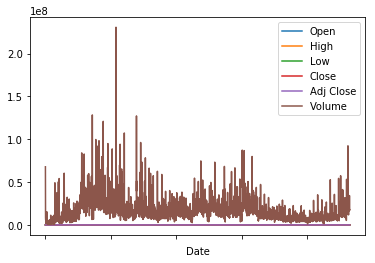

In [14]:
nvda.groupby(lambda x:x[:4]).transform(zscore).plot()

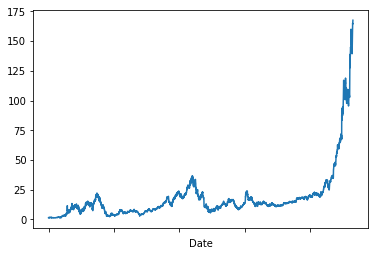

In [15]:
nvda['Adj Close'].plot()